In [1]:
import pandas as pd
from scipy.stats import zscore

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import glob
import os

In [2]:
input_dir = "inputs/"
output_dir = "outputs/"

Previously, we only calculated the zscore for the most variable genes used to determine clusters. Let's zscore the rest of the matrix so we can look at expression of any gene in our set. 

In [3]:
all_counts = pd.read_csv(os.path.join(input_dir, "counts_filtered.csv"), index_col=0)
print(all_counts.shape)
all_counts.head()

(5065, 1660)


,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTCTCTTA-1,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1
Gene name,,,,,,,,,,,,,,,,,,,,,
0610009B22Rik,0,0,1,0,2,2,0,0,0,0,...,0,0,6,0,0,0,0,0,0,0
0610009O20Rik,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610010K14Rik,0,0,0,0,0,0,1,0,3,0,...,1,0,2,0,0,0,0,0,0,0
0610012G03Rik,3,1,1,0,6,0,1,3,12,0,...,4,0,2,5,0,0,0,5,0,3
0610030E20Rik,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0


In [4]:
#Calculate TPM
all_counts_tpm = (all_counts/all_counts.sum())*10000
print(all_counts_tpm.shape)
all_counts_tpm.head()

(5065, 1660)


,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTCTCTTA-1,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1
Gene name,,,,,,,,,,,,,,,,,,,,,
0610009B22Rik,0.000000,0.000000,1.218175,0.0,2.730748,2.207993,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,8.701958,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
0610009O20Rik,1.533978,6.402049,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
0610010K14Rik,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.595405,0.000000,2.136144,0.0,...,1.215362,0.0,2.900653,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
0610012G03Rik,4.601933,3.201024,1.218175,0.0,8.192245,0.000000,1.595405,5.154639,8.544574,0.0,...,4.861449,0.0,2.900653,10.006004,0.0,0.0,0.0,5.186722,0.0,8.828723
0610030E20Rik,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,3.646087,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


In [5]:
#z-score normalize
all_counts_zscore = pd.DataFrame(zscore(all_counts_tpm, axis=1), index = all_counts_tpm.index)
all_counts_zscore.columns = all_counts_tpm.columns
print(all_counts_zscore.shape)
all_counts_zscore.head()

(5065, 1660)


,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTCTCTTA-1,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1
Gene name,,,,,,,,,,,,,,,,,,,,,
0610009B22Rik,-0.491207,-0.491207,0.203760,-0.491207,1.066680,0.768449,-0.491207,-0.491207,-0.491207,-0.491207,...,-0.491207,-0.491207,4.473243,-0.491207,-0.491207,-0.491207,-0.491207,-0.491207,-0.491207,-0.491207
0610009O20Rik,1.204832,5.870142,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254,...,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254
0610010K14Rik,-0.441212,-0.441212,-0.441212,-0.441212,-0.441212,-0.441212,0.844160,-0.441212,1.279817,-0.441212,...,0.537970,-0.441212,1.895759,-0.441212,-0.441212,-0.441212,-0.441212,-0.441212,-0.441212,-0.441212
0610012G03Rik,0.503587,0.110724,-0.445335,-0.786953,1.510433,-0.786953,-0.339547,0.658584,1.609238,-0.786953,...,0.576364,-0.786953,0.026489,2.019073,-0.786953,-0.786953,-0.786953,0.667581,-0.786953,1.688923
0610030E20Rik,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,...,2.044368,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174


In [6]:
#save result
all_counts_zscore.to_csv(os.path.join(output_dir, "all_counts_zscore.csv"))

**Make summary plots using the top 5 markers for each cluster**

In [7]:
#glob functions let us grab lots of file names at a time using the star wildcard character

res_files = glob.glob(os.path.join(input_dir, "*_markers.csv"))
res_files

['inputs/cluster7_markers.csv',
 'inputs/cluster5_markers.csv',
 'inputs/cluster3_markers.csv',
 'inputs/cluster1_markers.csv',
 'inputs/cluster2_markers.csv',
 'inputs/cluster0_markers.csv',
 'inputs/cluster6_markers.csv',
 'inputs/cluster4_markers.csv']

We are going to write a for loop to load in each dataframe and grab the top 5 marker genes for each cluster.

In [8]:
genes_by_cluster = dict()

for cluster in res_files:
    df = pd.read_csv(cluster, index_col=0)
    df.sort_values('avg_logFC', ascending=False, inplace=True)
    cluster_number = os.path.basename(cluster).split("_")[0]
    genes = list(df.index[:5])
    genes_by_cluster[cluster_number] = genes

In [9]:
df.sort_values('avg_logFC', ascending=False).head()

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Fcgbp,9.521516e-80,3.405565,1.000,0.377,4.822648e-76
Zg16,2.037844e-31,3.383723,0.953,0.724,1.032168e-27
Agr2,3.107710e-68,3.306973,1.000,0.668,1.574055e-64
Muc2,1.815341e-81,3.242582,0.963,0.296,9.194701e-78
Guca2a,2.708340e-70,3.126447,0.981,0.410,1.371774e-66


In [10]:
genes_by_cluster

{'cluster0': ['Ifitm3', 'Slc12a2', 'Gkn3', 'Jaml', 'Npm1'],
 'cluster1': ['Ube2c', 'Pclaf', 'Birc5', 'Tuba1b', 'Hmgb2'],
 'cluster2': ['Cdh1', 'Tmc4', 'Rpn1', 'Hspa9', 'Ddb1'],
 'cluster3': ['St3gal4', 'Slc51a', 'Car4', 'Apol10a', 'Gsdmc4'],
 'cluster4': ['Fcgbp', 'Zg16', 'Agr2', 'Muc2', 'Guca2a'],
 'cluster5': ['Apoa4', 'Apoa1', 'Apoc3', 'Rbp2', 'Fabp1'],
 'cluster6': ['Chgb', 'Sct', 'Chga', 'Myl7', 'Tm4sf4'],
 'cluster7': ['Gm7861', 'Defa29', 'Defa37', 'Gm14851', 'Defa22']}

In [11]:
genes_by_cluster.values()

[['Cdh1', 'Tmc4', 'Rpn1', 'Hspa9', 'Ddb1'],
 ['St3gal4', 'Slc51a', 'Car4', 'Apol10a', 'Gsdmc4'],
 ['Ifitm3', 'Slc12a2', 'Gkn3', 'Jaml', 'Npm1'],
 ['Ube2c', 'Pclaf', 'Birc5', 'Tuba1b', 'Hmgb2'],
 ['Chgb', 'Sct', 'Chga', 'Myl7', 'Tm4sf4'],
 ['Gm7861', 'Defa29', 'Defa37', 'Gm14851', 'Defa22'],
 ['Fcgbp', 'Zg16', 'Agr2', 'Muc2', 'Guca2a'],
 ['Apoa4', 'Apoa1', 'Apoc3', 'Rbp2', 'Fabp1']]

In [12]:
cell_assignments = pd.read_csv(os.path.join(input_dir, "cells_phenograph_k30_assignment.csv"), names=['barcode','community'])
cell_assignments.set_index('barcode', inplace=True)
print(cell_assignments.shape)
cell_assignments.head()

(1660, 1)


,community
barcode,
AAACATTGTTTGGG-1,6
AAACCGTGCCAAGT-1,5
AAACGCACAGCCTA-1,3
AAACGCACCAGATC-1,1
AAACGCACCGCCTT-1,0


/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


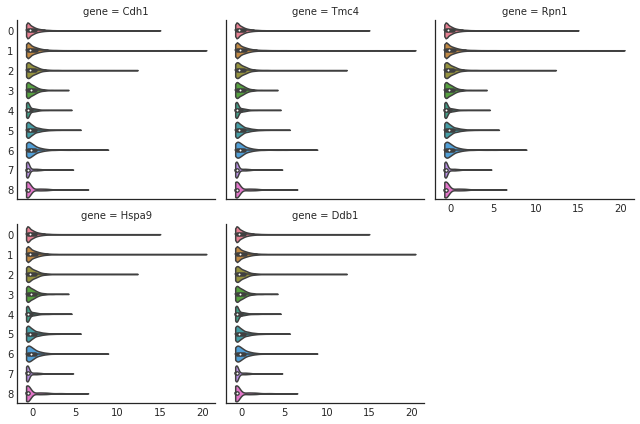

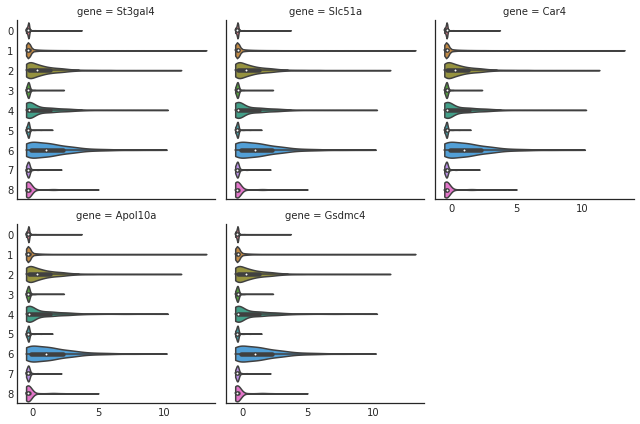

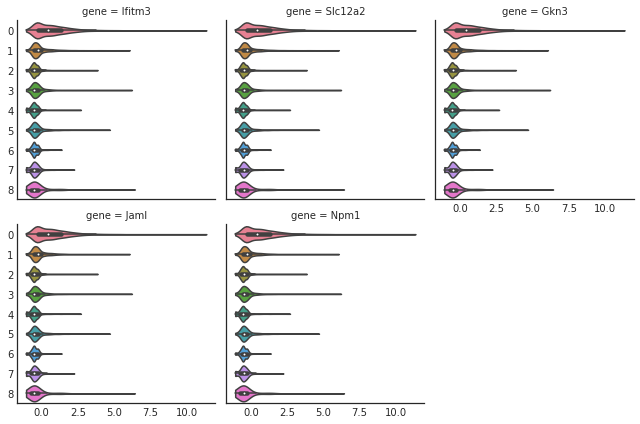

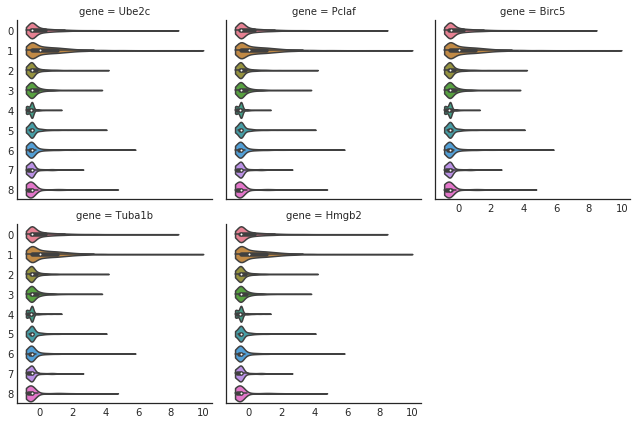

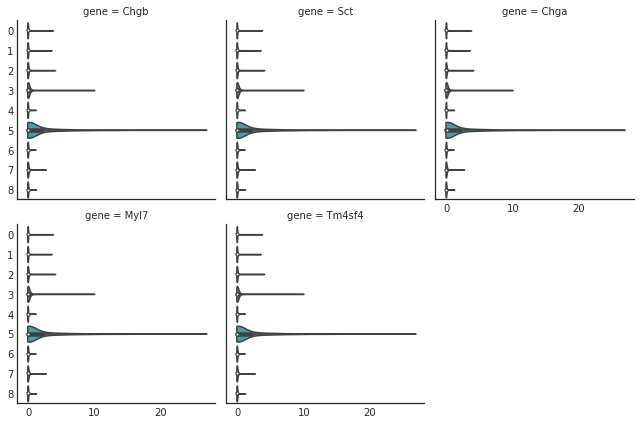

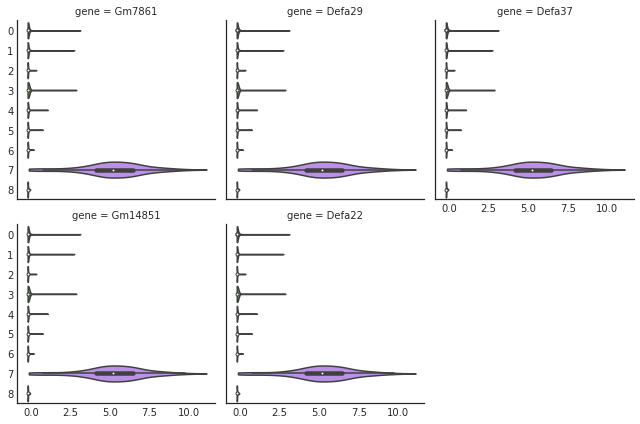

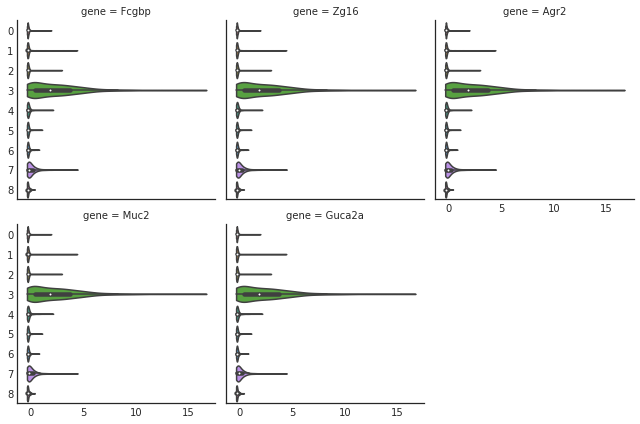

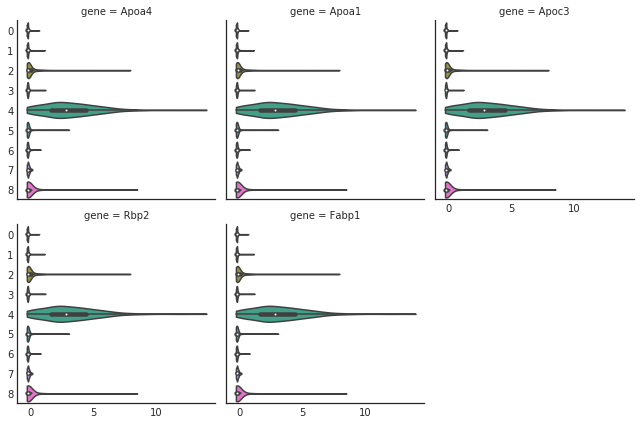

In [13]:
sns.set_style("white")
for cluster in genes_by_cluster.keys():
    genes_of_interest = genes_by_cluster[cluster]
    subset=all_counts_zscore.loc[genes_of_interest].T
    subset = subset.join(cell_assignments)
    tidy = pd.melt(subset, id_vars='community', value_vars = genes_of_interest,
                  value_name = 'z_score_expression', var_name = 'gene')
    g = sns.FacetGrid(tidy, col='gene', col_wrap=3)
    g.map(sns.violinplot, x='z_score_expression', y='community', data=tidy,  
      cut=0, scale='width', orient='h', palette='husl')
#     g.map(sns.stripplot, x='z_score_expression', y='community', data=tidy,  
#       palette='husl', jitter=True)

    plt.show()

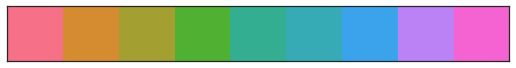

In [14]:
colors = sns.color_palette(palette="husl", n_colors=9)
sns.palplot(colors)

In [15]:
print(all_counts_zscore.shape)
all_counts_zscore.head()

(5065, 1660)


,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTCTCTTA-1,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1
Gene name,,,,,,,,,,,,,,,,,,,,,
0610009B22Rik,-0.491207,-0.491207,0.203760,-0.491207,1.066680,0.768449,-0.491207,-0.491207,-0.491207,-0.491207,...,-0.491207,-0.491207,4.473243,-0.491207,-0.491207,-0.491207,-0.491207,-0.491207,-0.491207,-0.491207
0610009O20Rik,1.204832,5.870142,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254,...,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254,-0.265254
0610010K14Rik,-0.441212,-0.441212,-0.441212,-0.441212,-0.441212,-0.441212,0.844160,-0.441212,1.279817,-0.441212,...,0.537970,-0.441212,1.895759,-0.441212,-0.441212,-0.441212,-0.441212,-0.441212,-0.441212,-0.441212
0610012G03Rik,0.503587,0.110724,-0.445335,-0.786953,1.510433,-0.786953,-0.339547,0.658584,1.609238,-0.786953,...,0.576364,-0.786953,0.026489,2.019073,-0.786953,-0.786953,-0.786953,0.667581,-0.786953,1.688923
0610030E20Rik,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,...,2.044368,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174,-0.262174


In [16]:
cells_sorted = all_counts_zscore.T.join(cell_assignments['community']).sort_values(by='community')
print(cells_sorted.shape)
cells_sorted.head()

(1660, 5066)


,0610009B22Rik,0610009O20Rik,0610010K14Rik,0610012G03Rik,0610030E20Rik,0610037L13Rik,0610040J01Rik,1010001N08Rik,1110004E09Rik,1110004F10Rik,...,mt-Co3,mt-Cytb,mt-Nd1,mt-Nd2,mt-Nd3,mt-Nd4,mt-Nd4l,mt-Nd5,mt-Nd6,community
TGTAAAACGGCAAG-1,-0.491207,-0.265254,-0.441212,-0.362310,-0.262174,-0.357875,3.519240,0.739990,-0.421467,-0.584135,...,-0.453947,-0.581234,-0.550557,-0.385395,-0.119380,-0.615759,-0.453642,-0.598476,-0.366423,0
CGTAACGAAGTACC-1,-0.491207,-0.265254,-0.441212,-0.786953,-0.262174,-0.357875,-0.379942,-0.201509,-0.421467,-0.584135,...,1.502327,1.956394,1.427938,2.225682,0.583215,1.959054,2.060953,-0.598476,-0.366423,0
CGTACAGATGTCTT-1,-0.491207,-0.265254,0.894228,1.072382,-0.262174,-0.357875,-0.379942,-0.201509,0.791365,0.164550,...,-0.268957,-0.152614,-0.395293,-0.266529,-0.092818,-0.288164,-0.453642,-0.425069,-0.366423,0
CGTACCTGTGTCTT-1,-0.491207,-0.265254,0.771600,0.057347,-0.262174,-0.357875,-0.379942,-0.201509,1.781459,0.775737,...,-0.563972,-0.598509,-0.534329,-0.344055,-0.400031,-0.539189,0.259893,-0.126023,-0.366423,0
CGTTAACTACACTG-1,-0.491207,2.183262,-0.441212,-0.070463,-0.262174,-0.357875,-0.379942,0.592775,-0.421467,-0.584135,...,-0.557922,-0.468469,-0.322464,-0.425841,-0.400031,-0.552459,0.757398,-0.197543,-0.366423,0


In [17]:
communities = set(cells_sorted['community'])
color_dict = dict(zip(communities, colors))

In [18]:
color_list = []
for i in cells_sorted['community']:
    to_append = color_dict[i]
    color_list.append(to_append)
    

In [19]:
cells_sorted.head()

,0610009B22Rik,0610009O20Rik,0610010K14Rik,0610012G03Rik,0610030E20Rik,0610037L13Rik,0610040J01Rik,1010001N08Rik,1110004E09Rik,1110004F10Rik,...,mt-Co3,mt-Cytb,mt-Nd1,mt-Nd2,mt-Nd3,mt-Nd4,mt-Nd4l,mt-Nd5,mt-Nd6,community
TGTAAAACGGCAAG-1,-0.491207,-0.265254,-0.441212,-0.362310,-0.262174,-0.357875,3.519240,0.739990,-0.421467,-0.584135,...,-0.453947,-0.581234,-0.550557,-0.385395,-0.119380,-0.615759,-0.453642,-0.598476,-0.366423,0
CGTAACGAAGTACC-1,-0.491207,-0.265254,-0.441212,-0.786953,-0.262174,-0.357875,-0.379942,-0.201509,-0.421467,-0.584135,...,1.502327,1.956394,1.427938,2.225682,0.583215,1.959054,2.060953,-0.598476,-0.366423,0
CGTACAGATGTCTT-1,-0.491207,-0.265254,0.894228,1.072382,-0.262174,-0.357875,-0.379942,-0.201509,0.791365,0.164550,...,-0.268957,-0.152614,-0.395293,-0.266529,-0.092818,-0.288164,-0.453642,-0.425069,-0.366423,0
CGTACCTGTGTCTT-1,-0.491207,-0.265254,0.771600,0.057347,-0.262174,-0.357875,-0.379942,-0.201509,1.781459,0.775737,...,-0.563972,-0.598509,-0.534329,-0.344055,-0.400031,-0.539189,0.259893,-0.126023,-0.366423,0
CGTTAACTACACTG-1,-0.491207,2.183262,-0.441212,-0.070463,-0.262174,-0.357875,-0.379942,0.592775,-0.421467,-0.584135,...,-0.557922,-0.468469,-0.322464,-0.425841,-0.400031,-0.552459,0.757398,-0.197543,-0.366423,0


In [20]:
import itertools
genes_of_interest = list(itertools.chain.from_iterable(genes_by_cluster.values()))
print(len(genes_of_interest))

40


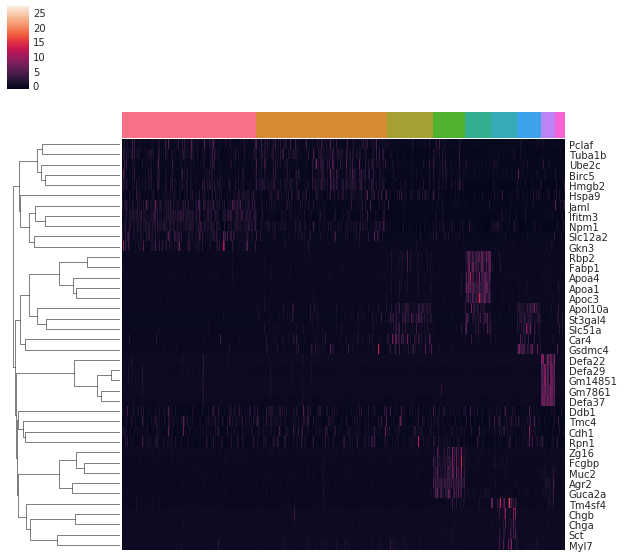

In [21]:
g = sns.clustermap(cells_sorted.loc[:,genes_of_interest].T, xticklabels='', col_colors = color_list, col_cluster=False)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()